# MCMC
## 基本思路：
在随机变量$x$的状态空间$\mathcal{S}$上定义一个**Markov chain**
$$X=\{X_0,X_1,X_2,...X_t,...\}$$
使其平稳分布就是我们要抽样的目标分布$p(x)$。然后基于该**Markov chain**进行随机游走产生对应的样本序列家逆行数值计算。当时间足够长时，抽样所得到的分布就会趋近于平稳分布，基于该**Markov chain**的抽样结果就是目标概率分布的抽样结果。对抽样结果的函数均值计算就是目标数学期望值。

## 具体步骤
* 在随机变量$x$的状态空间$\mathcal{S}$上定义一个满足遍历定理的**Markov chain**，使其平稳分布为目标分布$p(x)$;
* 从状态空间中某一点$\vec{x_0}$出发，在构造的**Markov chain**上进行随机游走，可以得到样本序列$$x_0,x_1,...,x_t$$
* 根据**Markov chain**的遍历定理，确定正整数$m,n$,可以得到样本集合
$$\{x_{m+1},x_{m+2},...,x_n\}$$
最后可以得到函数$f(x)$的遍历均值：
$$\hat{E}(f)=\frac{1}{n-m}\sum_{i=m+1}^nf(x_i)$$

**关键问题：如何构造满足条件的Markov chain？常用的方法有Metropolis-Hasting算法和Gibbs抽样。**

## Metropolis-Hasting Algorithm ——M-H采样

该算法由$\textit{Metropolis}$提出由$\textit{Hasting}$改进,假设目标抽样分布为$p(x)$，$M-H$算法采用的状态转移核为$p(x,x')$,则**Marcov cahin**定义为
$$p(x,x')=q(x,x')\alpha(x,x')$$
其中$q(x,x'),\alpha(x,x')$分别为建议分布和接受分布。建议分布也可以是另一个马尔可夫链的转移核，形式也可以多种多样。包括对称形式和独立抽样形式，假设建议分布是对称的:
$$symmetry\Longrightarrow q(x,x')=q(x',x)$$
接受分布形式如下：
$$\alpha(x,x')=\min\Bigg\{1,\frac{p(x')q(x',x)}{p(x)q(x,x')}\Bigg\}$$
具体游走过程：如果在$T=t-1$时刻出于状态$x$，$i.e. x_{t-1}=x$，那么先按照建议分布$q(x,x')$产生一个候选状态$x'$。然后按照接受分布$\alpha(x,x')$抽样决定是否接受这个状态。也就是说以$\alpha(x,x)'$的概率接受这个状态$x'$，以$1-\alpha(x,x')$的概率拒绝$x'$。
假设目标平稳分布是一个正态分布，则：

/Users/zhonghaowen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


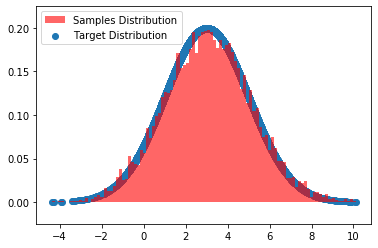

In [6]:
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
#Define the smooth distribution
#Gaussian distribution mu = 3, sigma = 2
def smooth_dist(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 10000
pi = [0 for i in range(T)]
sigma = 1
#Inital value
t = 0
#Iteration
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t-1],scale=sigma,size=1,random_state = None)
    alpha = min(1,(smooth_dist(pi_star[0])/smooth_dist(pi[t-1])))
    u = random.uniform(0,1)
    if u<alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t-1]
        
plt.scatter(pi,norm.pdf(pi,loc=3,scale = 2),label="Target Distribution")
num_bins = 100
plt.hist(pi,
        num_bins,
        normed= 1,
        facecolor = 'red',
        alpha =0.6,
        label="Samples Distribution")
plt.legend()
plt.show()

In [32]:
norm?